## Language detection by most frequent words

## Libraries

In [1]:
import pandas as pd
import seaborn as sns #Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import matplotlib.pyplot as plt
import string
import numpy as np# multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
from collections import OrderedDict

## Load dataset

In [2]:
lang_list = ['Danish', 'Dutch', 'English', 'French', 'German', 'Greek','Italian', 'Portugeese', 'Spanish', 'Sweedish', 'Turkish']
data = pd.read_csv('language_detection.csv',sep=';')   #store big data sets is to use CSV files
				                    #need to import pd library
				                    #stores dataset.csv to data

In [3]:
data.head() #displays the first five rows of the dataframe by default.
# a = data.loc[data['language']=='English']
# display(a)
#data['Text'][37]

,Text,language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
data['language'].value_counts()
#data['Text'][37]
#data['language'][37]

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Sweedish       676
Dutch          546
Turkish        474
German         470
Danish         428
Greek          365
Name: language, dtype: int64

## Visualize dataset

c:\Users\SERRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

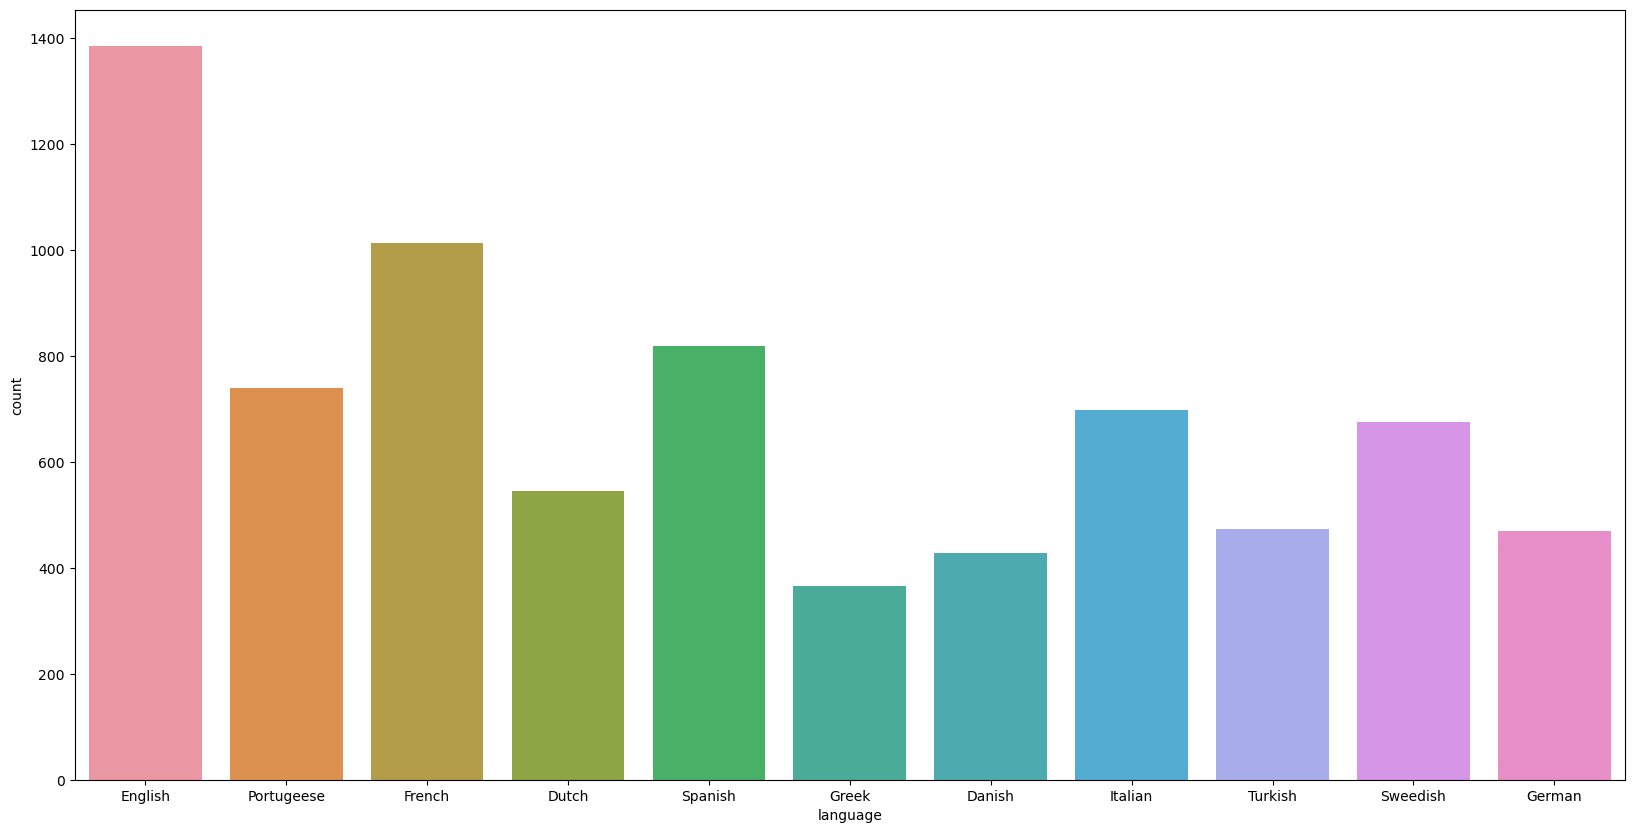

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(data['language']) #seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

## Remove punctuation

In [6]:
characters = string.punctuation+"0"+"1"+"2"+"3"+"4"+"5"+"6"+"7"+"8"+"9"
characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [7]:
#funtion to remove punctuation and all smallcase letters#
def remove_pun(text):
    for pun in characters:
        text=text.replace(pun,"")
    text = text.lower()
    return(text)

In [8]:
remove_pun("SER5RA 8 E==rt3(unç)")

'serra  ertunç'

In [9]:
data['Text']=data['Text'].apply(remove_pun)

In [10]:
data.head()

,Text,language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English


In [11]:
data.loc[data['language'] == 'English', 'Text'] #returns texts in English

0        nature in the broadest sense is the natural p...
1       nature can refer to the phenomena of the physi...
2       the study of nature is a large if not the only...
3       although humans are part of nature human activ...
4        the word nature is borrowed from the old fren...
                              ...                        
1380    what your mistake was come lets feed you somet...
1381    narcisa changed her ways she struggled at firs...
1382    hows narcissism now marian told them both ever...
1383    has she i guess she wouldnt want any more gold...
1384    terry you actually look a little like that ang...
Name: Text, Length: 1385, dtype: object

In [12]:
b=data.loc[data['language'] == 'French', 'Text'][2124]
b

'si vous disposez douvrages ou darticles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici merci de compléter larticle en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0notes et références\xa0» en pratique\xa0 quelles sources sont attendues\xa0'

In [13]:
print(type(b))
data.loc[data['Text'] == b, 'language'].index.values[0]

<class 'str'>


2124

### Generate Corpus

In [14]:
def generate_corpus(lang):
    corpus_lang=[]
    index0=data.loc[data['language'] == lang, 'Text'].index.values[0]
    #print(index0)
    i=index0
    for i in range (index0, index0+len(data.loc[data['language'] == lang, 'Text'])):
        corpus_lang.append(data.loc[data['language'] == lang, 'Text'][i])
    #print(len(corpus_lang))
    return corpus_lang

In [15]:
#create corpus dictionary
corpus_dict = {lang: 0 for lang in lang_list}
for lang in lang_list:
    corpus_dict[lang]=generate_corpus(lang)

In [16]:
#create corpus that has all language texts
corpus=[]
list_l=["English","Portugeese","French","Dutch","Spanish","Greek","Danish","Italian","Turkish","Sweedish","German"]
for lang in list_l:
    corpus=corpus+corpus_dict[lang]

In [17]:
len(corpus)

7614

In [18]:
for lang in lang_list:
    print(lang,"corpus size: ",len(corpus_dict[lang]))

Danish corpus size:  428
Dutch corpus size:  546
English corpus size:  1385
French corpus size:  1014
German corpus size:  470
Greek corpus size:  365
Italian corpus size:  698
Portugeese corpus size:  739
Spanish corpus size:  819
Sweedish corpus size:  676
Turkish corpus size:  474


## Convert sentences into vector

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50) #Countvectorizer is a method to convert text to numerical data.
                                        #max_features = 3, it will select the 3 most common words in the data.
                                        #as max_features increases prediction becomes more accurate
X_eng = cv.fit_transform(corpus_dict["English"]).toarray()

In [20]:
X_eng.shape

(1385, 50)

In [21]:
#most get freuquent words in English using cv.vocabulary_
cv.vocabulary_
dict1 = OrderedDict(sorted(cv.vocabulary_.items()))
print(dict1)

OrderedDict([('about', 0), ('all', 1), ('also', 2), ('an', 3), ('and', 4), ('are', 5), ('article', 6), ('articles', 7), ('as', 8), ('at', 9), ('be', 10), ('been', 11), ('but', 12), ('by', 13), ('can', 14), ('data', 15), ('editors', 16), ('for', 17), ('from', 18), ('has', 19), ('have', 20), ('if', 21), ('in', 22), ('is', 23), ('it', 24), ('its', 25), ('learning', 26), ('life', 27), ('machine', 28), ('more', 29), ('not', 30), ('of', 31), ('on', 32), ('one', 33), ('or', 34), ('other', 35), ('so', 36), ('some', 37), ('such', 38), ('that', 39), ('the', 40), ('this', 41), ('to', 42), ('use', 43), ('was', 44), ('were', 45), ('which', 46), ('wikipedia', 47), ('with', 48), ('you', 49)])


In [22]:
#most get freuquent words in English using cv.get_feature_names()
print(cv.get_feature_names())

['about', 'all', 'also', 'an', 'and', 'are', 'article', 'articles', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'data', 'editors', 'for', 'from', 'has', 'have', 'if', 'in', 'is', 'it', 'its', 'learning', 'life', 'machine', 'more', 'not', 'of', 'on', 'one', 'or', 'other', 'so', 'some', 'such', 'that', 'the', 'this', 'to', 'use', 'was', 'were', 'which', 'wikipedia', 'with', 'you']


c:\Users\SERRA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Create wordbag

In [23]:
word_bag = {lang: 0 for lang in lang_list}
#cv = CountVectorizer(max_features=50)
for lang in lang_list:
    print(lang,":",cv.fit_transform(corpus_dict[lang]).toarray().shape)
    word_bag[lang]=cv.get_feature_names()

Danish : (428, 50)
Dutch : (546, 50)
English : (1385, 50)
French : (1014, 50)
German : (470, 50)
Greek : (365, 50)
Italian : (698, 50)
Portugeese : (739, 50)
Spanish : (819, 50)
Sweedish : (676, 50)
Turkish : (474, 50)


In [24]:
vocabulary = []
for lang in lang_list:
    vocabulary =  vocabulary+ word_bag[lang]
len(vocabulary)

550

In [25]:
vectorizer = CountVectorizer()
a=vectorizer.fit_transform(vocabulary)
#print(vectorizer.get_feature_names_out())
#print(len(vectorizer.get_feature_names_out()))
X = vectorizer.transform(corpus).toarray()
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=1000) #Countvectorizer is a method to convert text to numerical data.
#                                         #max_features = 3, it will select the 3 most common words in the data.
#                                         #as max_features increases prediction becomes more accurate
# X = cv.fit_transform(corpus).toarray()

In [26]:
vectorizer.vocabulary_

{'af': 4,
 'anden': 17,
 'at': 33,
 'betyder': 50,
 'de': 84,
 'den': 90,
 'denne': 91,
 'der': 92,
 'det': 94,
 'dette': 96,
 'dig': 103,
 'du': 111,
 'eller': 126,
 'en': 128,
 'er': 132,
 'et': 139,
 'for': 148,
 'godt': 158,
 'gøre': 161,
 'han': 167,
 'har': 168,
 'hun': 178,
 'hvad': 180,
 'hvis': 181,
 'ikke': 187,
 'jeg': 200,
 'kan': 202,
 'med': 222,
 'meget': 223,
 'men': 224,
 'mig': 228,
 'min': 230,
 'nogen': 250,
 'noget': 251,
 'nogle': 252,
 'og': 262,
 'om': 267,
 'ord': 273,
 'på': 294,
 'sige': 310,
 'skal': 315,
 'som': 318,
 'så': 331,
 'til': 341,
 'var': 358,
 'ved': 361,
 'vil': 365,
 'ville': 367,
 'være': 373,
 'wikipedia': 381,
 'aan': 0,
 'als': 11,
 'andere': 18,
 'ben': 48,
 'betekent': 49,
 'dan': 78,
 'dat': 82,
 'deze': 98,
 'die': 102,
 'dit': 106,
 'door': 109,
 'dus': 113,
 'een': 117,
 'goed': 159,
 'heb': 172,
 'hebt': 173,
 'het': 175,
 'iemand': 184,
 'ik': 186,
 'in': 189,
 'is': 191,
 'je': 199,
 'kunt': 206,
 'maar': 217,
 'me': 221,
 'met': 

In [27]:
X.shape

(7614, 454)

In [28]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## LabelEncoding (Convert language name into 1,2,3....etc)

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['language'])#labels languages in alphabetic order

In [30]:
data['language']

0       English
1       English
2       English
3       English
4       English
         ...   
7609     German
7610     German
7611     German
7612     German
7613     German
Name: language, Length: 7614, dtype: object

In [31]:
y

array([2, 2, 2, ..., 4, 4, 4])

In [32]:
len(y) #len(y)=11
label.classes_

array(['Danish', 'Dutch', 'English', 'French', 'German', 'Greek',
       'Italian', 'Portugeese', 'Spanish', 'Sweedish', 'Turkish'],
      dtype=object)

## Final data

In [33]:
import numpy as np

In [34]:
corpus

[' nature in the broadest sense is the natural physical material world or universe',
 'nature can refer to the phenomena of the physical world and also to life in general',
 'the study of nature is a large if not the only part of science',
 'although humans are part of nature human activity is often understood as a separate category from other natural phenomena',
 ' the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth',
 ' in ancient philosophy natura is mostly used as the latin translation of the greek word physis φύσις which originally related to the intrinsic characteristics that plants animals and other features of the world develop of their own accord',
 ' \r\nthe concept of nature as a whole the physical universe is one of several expansions of the original notion it began with certain core applications of the word φύσις by presocratic philosophers thou

In [35]:
data_final = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])
data_final

,Sentence,Language
0,nature in the broadest sense is the natural p...,2
1,nature can refer to the phenomena of the physi...,2
2,the study of nature is a large if not the only...,2
3,although humans are part of nature human activ...,2
4,the word nature is borrowed from the old fren...,2
...,...,...
7609,narcisa änderte ihre art und weise sie kämpfte...,4
7610,wie s narzissmus jetzt erzählt marian beiden a...,4
7611,hat sie ich denke sie würde jetzt kein goldbro...,4
7612,terry du siehst tatsächlich ein bisschen wie d...,4


## split data for training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6091, 454), (1523, 454), (6091,), (1523,))

## Define model

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
classifier = MultinomialNB().fit(X_train,y_train) #suitable for classification with discrete features (e.g., word counts for text classification). 
                                                    #The multinomial distribution normally requires integer feature counts.

## Test model

In [40]:
pred = classifier.predict(X_test)
pred

array([2, 8, 6, ..., 1, 8, 2])

In [41]:
y_test

array([7, 8, 6, ..., 1, 8, 0])

## Evaluate

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9087327642810243
[[ 78   0   7   0   0   0   0   1   0   4   0]
 [  0  97   6   0   0   0   0   0   0   0   0]
 [  0   0 275   0   0   0   0   1   4   0   0]
 [  0   2  10 194   0   0   0   0   4   0   0]
 [  0   0   8   0  78   0   0   0   0   2   0]
 [  0   0   6   0   0  67   0   0   0   0   0]
 [  0   0   9   5   0   0 123   1   2   0   0]
 [  0   0  11   0   0   0   0 135   2   0   0]
 [  0   0  13   2   0   0   3   1 131   0   0]
 [  1   0   8   0   0   0   0   0   0 143   0]
 [  0   0  24   1   1   0   0   0   0   0  63]]


In [43]:
#F-SCORE
from sklearn.metrics import f1_score
f1_score(y_test,pred,average=None)#ordered alphabeticly according to language

array([0.92307692, 0.96039604, 0.83713851, 0.94174757, 0.93413174,
       0.95714286, 0.92481203, 0.94076655, 0.89419795, 0.95016611,
       0.82894737])

## Actual Language vs Predicted Language

In [44]:
compared = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
compared

,Actual,Predicted
0,7,2
1,8,8
2,6,6
3,5,5
4,1,1
...,...,...
1518,4,4
1519,10,2
1520,1,1
1521,8,8


In [45]:
pd.DataFrame(np.c_[data['Text'],data['language'],y],columns=['Sentence','Language','Code'])

,Sentence,Language,Code
0,nature in the broadest sense is the natural p...,English,2
1,nature can refer to the phenomena of the physi...,English,2
2,the study of nature is a large if not the only...,English,2
3,although humans are part of nature human activ...,English,2
4,the word nature is borrowed from the old fren...,English,2
...,...,...,...
7609,narcisa änderte ihre art und weise sie kämpfte...,German,4
7610,wie s narzissmus jetzt erzählt marian beiden a...,German,4
7611,hat sie ich denke sie würde jetzt kein goldbro...,German,4
7612,terry du siehst tatsächlich ein bisschen wie d...,German,4


## Save model

In [46]:
import joblib

In [47]:
joblib.dump(classifier , 'language_detection1.sav')

['language_detection1.sav']

## Load model

In [48]:
import joblib

In [49]:
model = joblib.load('language_detection1.sav')

In [50]:
pred_y = model.predict(X_test)
pred_y

array([2, 8, 6, ..., 1, 8, 2])

## predict texts language with the model

In [51]:
text = remove_pun("seni çok seviyorum")
text=vectorizer.transform([text]).toarray()
#text.shape ----> (1, 454)
output = model.predict(text)[0]
output

10

In [52]:
text

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [53]:
#function to predict text with the model
def model_predict(text_example):
    languages = label.classes_#['Danish', 'Dutch', 'English', 'French', 'German', 'Greek', 'Italian', 'Portugeese', 'Spanish', 'Sweedish', 'Turkish']

    text = remove_pun(text_example)
    text=vectorizer.transform([text]).toarray()
    #print(text.shape)#(1, 454)
    output = model.predict(text)[0]
    #print(languages[output])
    return languages[output]

In [54]:
model_predict("Nein, ich will dich nicht heiraten.")

'German'

In [55]:
model_predict("where are you")

'English'

In [56]:
model_predict("seni çok seviyorum")

'Turkish'

### GUI

In [57]:
import tkinter as tk

In [58]:
# Top level window
frame = tk.Tk()
frame.title("mostfrequentword_LD")
frame.geometry('400x200')
# Function for getting Input
# from textbox and printing it 
# at label widget
  
def printInput():
    inp = inputtxt.get(1.0, "end-1c")
    lbl.config(text = "Predicted Language: "+model_predict(inp))
  
# TextBox Creation
inputtxt = tk.Text(frame,
                   height = 5,
                   width = 40)
  
inputtxt.pack()
  
# Button Creation
printButton = tk.Button(frame,
                        text = "Predict", 
                        command = printInput)
printButton.pack()
  
# Label Creation
lbl = tk.Label(frame, text = "")
lbl.pack()
frame.mainloop()